### **Importing Libraries**

In [2]:
import sklearn
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Machine/Copy of Heart Failure Records.csv")

x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values
dataset.head()

,Age,Anaemia,Creatinine phosphokinase,Diabetes,Ejection fraction,High blood pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.30)


### **Logistic Regression (Training & Predcting)**

In [5]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 1000)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)



### **Logistic Regression (Accuracy)**

In [6]:
from sklearn.metrics import accuracy_score
print("Testing accuracy for Logistic Regression =",accuracy_score(y_test,y_pred) * 100,"%")

Testing accuracy for Logistic Regression = 78.88888888888889 %




### **Logistic Regression (Confusion Matrix)**

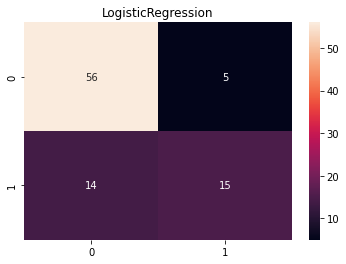

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cM = confusion_matrix(y_test, y_pred)
plt.title("LogisticRegression")

sns.heatmap(cM, annot=True)
plt.savefig('con_Dig.png')


### **Logistic Regression (Confusin Matrix Evaluate)**

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average="binary") * 100
print('Precision = %.3f' % precision,'%')
recall = recall_score(y_test, y_pred, average="binary") * 100
print('Recall = %.3f' % recall,'%')
f_measure = f1_score(y_test, y_pred, average="binary") * 100
print('f_measure = %.3f' % f_measure,'%')

Precision = 75.000 %
Recall = 51.724 %
f_measure = 61.224 %




### **Logistic Regression (Cross Validation)**

In [9]:
from sklearn.model_selection import StratifiedKFold
num_splits = 10
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], [] 
for train_index, test_index in kfold.split(x, y):  
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    LR.fit(x_train, y_train)
    y_pred_train = LR.predict(x_train)
    y_pred_test = LR.predict(x_test)
    
    train_accs.append(accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(accuracy_score(y_test, y_pred_test) * 100)
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t\t", "Testing_Acc")

for i in range(num_splits):
    print(i," \t",'%.3f'% train_accs[i],"\t\t", '%.3f'% test_accs[i])
    
    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits
    
print("Average", "",'%.3f'% ave_train_acc,"\t\t", ave_test_acc)

	 Training_Acc 		 Testing_Acc
0  	 85.502 		 63.333
1  	 84.387 		 73.333
2  	 83.643 		 73.333
3  	 82.528 		 83.333
4  	 81.041 		 90.000
5  	 82.156 		 86.667
6  	 82.156 		 86.667
7  	 83.643 		 73.333
8  	 81.784 		 90.000
9  	 81.852 		 89.655
Average  82.869 		 80.96551724137932



### **Naive Bayes (Training & Predcting)**

In [10]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_gaussianNB = GaussianNB()
naive_bayes_gaussianNB.fit(x_train,y_train)
y_pred2 = naive_bayes_gaussianNB.predict(x_test)

### **Naive Bayes (Accuracy)**

In [11]:
from sklearn.metrics import accuracy_score
print("Testing accuracy for Naive Bayes =",accuracy_score(y_test,y_pred2) * 100,"%")

Testing accuracy for Naive Bayes = 93.10344827586206 %


### **Naive Bayes (Confusion Matrix)**

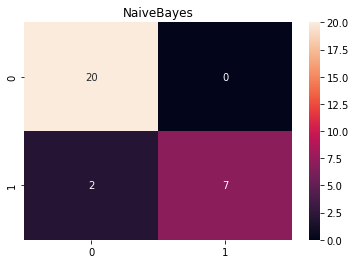

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cM = confusion_matrix(y_test, y_pred2)
plt.title("NaiveBayes")

sns.heatmap(cM, annot=True)
plt.savefig('con_Dig2.png')


### **Naive  Bayes (Confusin Matrix Evaluate)**

In [13]:
from sklearn.metrics import classification_report
precision = precision_score(y_test, y_pred2, average="binary") * 100
print('Precision = %.3f' % precision,'%')
recall = recall_score(y_test, y_pred2, average="binary") * 100
print('Recall = %.3f' % recall,'%')
f_measure = f1_score(y_test, y_pred2, average="binary") * 100
print('f_measure = %.3f' % f_measure,'%')

Precision = 100.000 %
Recall = 77.778 %
f_measure = 87.500 %




### **Naive Bayes (Cross Validation)**

In [14]:
from sklearn.model_selection import StratifiedKFold
num_splits = 20
kfold = StratifiedKFold(num_splits, shuffle= True, random_state = 1)
train_accs, test_accs = [], [] 
for train_index, test_index in kfold.split(x, y):  
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    naive_bayes_gaussianNB.fit(x_train, y_train)
    y_pred_train = naive_bayes_gaussianNB.predict(x_train)
    y_pred_test = naive_bayes_gaussianNB.predict(x_test)
    
    train_accs.append(accuracy_score(y_train, y_pred_train) * 100)
    test_accs.append(accuracy_score(y_test, y_pred_test) * 100)
ave_train_acc = 0
ave_test_acc = 0

print("\t","Training_Acc","\t\t", "Testing_Acc")

for i in range(num_splits):
    print(i," \t",'%.3f'% train_accs[i],"\t\t", '%.3f'% test_accs[i])
    
    ave_train_acc+= train_accs[i]/num_splits
    ave_test_acc+= test_accs[i]/num_splits
    
print("Average", "",'%.3f'% ave_train_acc,"\t\t", ave_test_acc)

	 Training_Acc 		 Testing_Acc
0  	 82.394 		 66.667
1  	 82.042 		 66.667
2  	 81.690 		 66.667
3  	 81.338 		 60.000
4  	 81.338 		 86.667
5  	 80.986 		 73.333
6  	 80.986 		 86.667
7  	 79.930 		 86.667
8  	 80.634 		 80.000
9  	 81.338 		 93.333
10  	 81.338 		 80.000
11  	 80.634 		 80.000
12  	 80.986 		 86.667
13  	 81.690 		 80.000
14  	 80.986 		 73.333
15  	 82.042 		 73.333
16  	 80.986 		 80.000
17  	 80.282 		 93.333
18  	 79.930 		 93.333
19  	 80.351 		 92.857
Average  81.095 		 79.97619047619048
